In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/home/nitesh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("glassdoor_jobs.csv")

## Exploring the dataset

In [3]:
df.shape

(956, 15)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [6]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


### No feature has missing values but there may be case where NaN values may be replcaed by 0 or -1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,956.0,477.500000,276.117729,0.0,238.75,477.5,716.25,955.0
Rating,956.0,3.601255,1.067619,-1.0,3.30,3.8,4.20,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.00,1992.0,2008.00,2019.0


#### NaN values are replaced by -1 in numerical features

## Exploratory Data Analysis and Data cleaning

In [9]:
df['Unnamed: 0'].nunique()

956

In [10]:
## This is just a number, we can drop this feature

In [11]:
df.drop(['Unnamed: 0'], axis = 1 , inplace = True)

In [12]:
df.shape

(956, 14)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipykernel_82230/242741418.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])


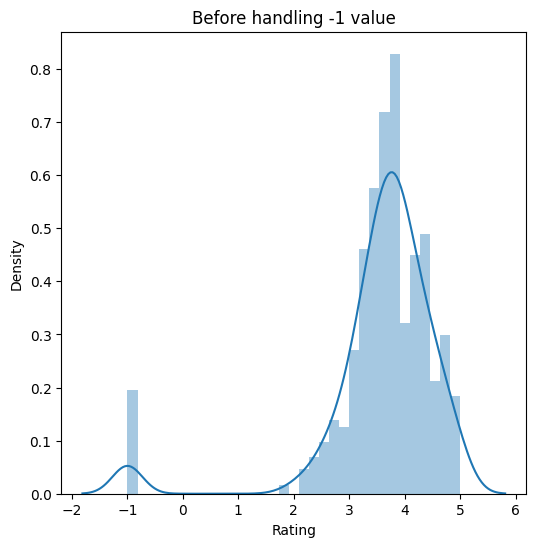

In [14]:
# Visualizatio 

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before handling -1 value')

In [15]:
df['Rating'] = df['Rating'].apply(lambda x:np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

/tmp/ipykernel_82230/2803085167.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])


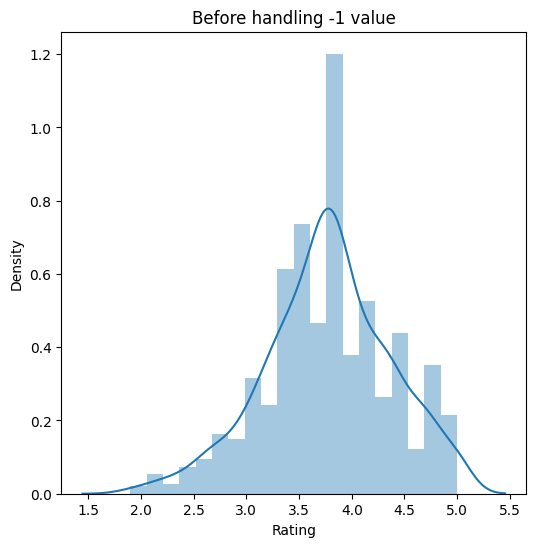

In [16]:

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before handling -1 value')

Text(0, 0.5, 'Rating')

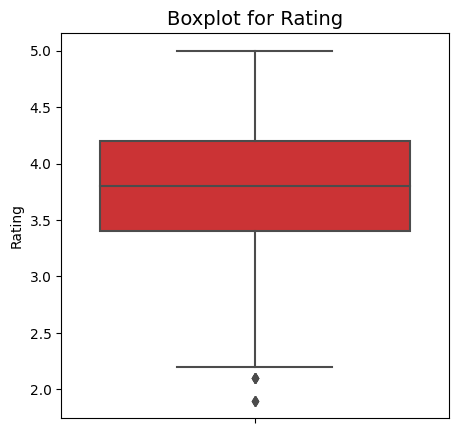

In [17]:
## Check for outliers in the Rating data

plt.figure(figsize = (5,5))
sns.boxplot(y = 'Rating' , data = df , orient = 'v' , palette='Set1')
plt.title('Boxplot for Rating' , fontsize = 14)
plt.ylabel('Rating')

/tmp/ipykernel_82230/1189447702.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df['Founded'])


<AxesSubplot: xlabel='Founded', ylabel='Density'>

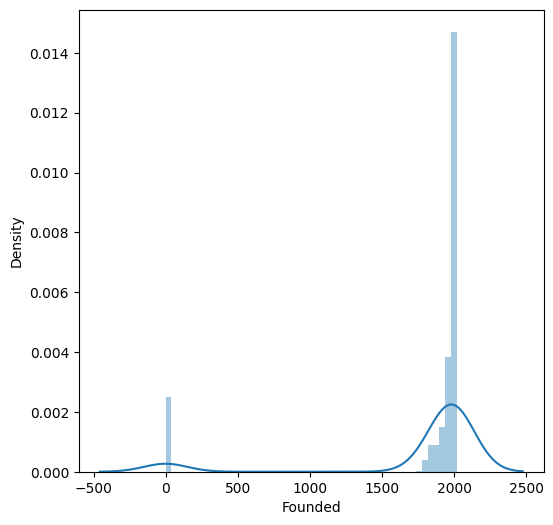

In [18]:
## Lets visualize the founded column

plt.figure(figsize = (6,6))
sns.distplot(a = df['Founded'])


In [19]:
df.groupby('Founded').size().reset_index()

,Founded,0
0,-1,97
1,1744,1
2,1781,14
3,1812,1
4,1830,4
...,...,...
104,2015,21
105,2016,15
106,2017,15
107,2018,2


In [20]:
## Handling the -1 values in Founded Column

df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].mean()))
df['Founded'] = df['Founded'].astype('int')

/tmp/ipykernel_82230/1410395027.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a = df['Founded'])


<AxesSubplot: xlabel='Founded', ylabel='Density'>

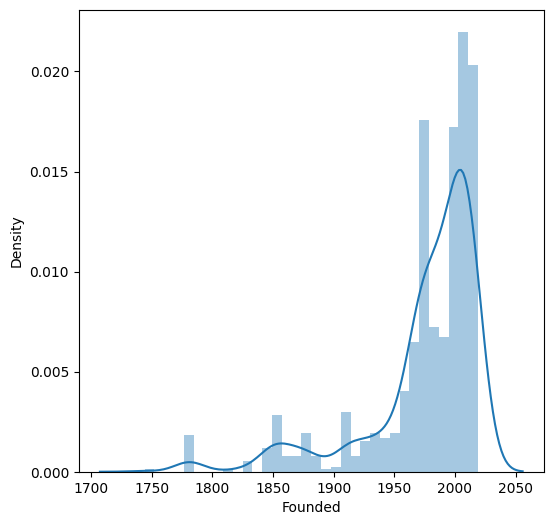

In [21]:
## Now visualiza the found column

plt.figure(figsize=(6,6))
sns.distplot(a = df['Founded'])

<AxesSubplot: ylabel='Founded'>

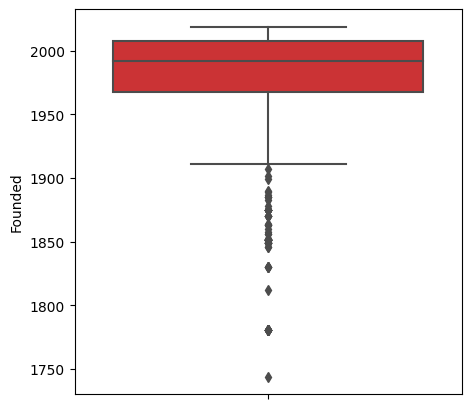

In [22]:
## Will check outliers also

plt.figure(figsize = (5,5))
sns.boxplot(y = 'Founded' , data = df , orient = 'v', palette='Set1')

### Now cleaning the Categorical features


In [23]:
## Cleaning the Job title column

df['Job Title'].value_counts().nlargest(30)

Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  4
Pharmaco

In [24]:
df['Job Title'].nunique()

328

In [25]:
def title_cleaner(title):
    
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer' 
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'others'
    
    

In [26]:
df['Job_title'] = df['Job Title'].apply(title_cleaner)

In [27]:
df['Job_title'].value_counts()

data scientist    560
data engineer     158
data analyst      105
others             72
manager            35
director           13
mle                13
Name: Job_title, dtype: int64

/tmp/ipykernel_82230/2868021012.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


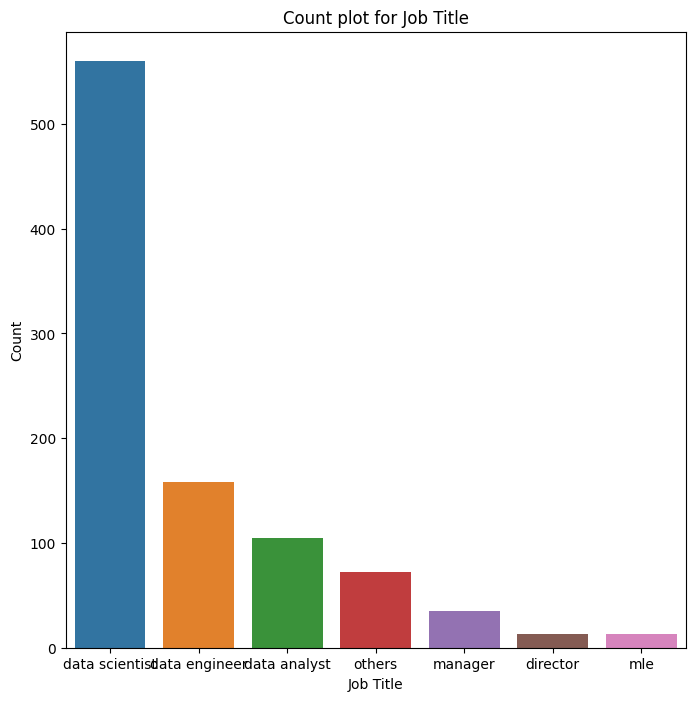

In [28]:
## We can plot histogram for distribution

plt.figure(figsize = (8,8))

sns.countplot(x = 'Job_title' , data = df , order = df['Job_title'].value_counts().index)
p = plt.title('Count plot for Job Title')
p = plt.xlabel('Job Title')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [29]:
df.shape

(956, 15)

In [30]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'others'

In [31]:
df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

others    701
sr        252
jr          3
Name: job_seniority, dtype: int64

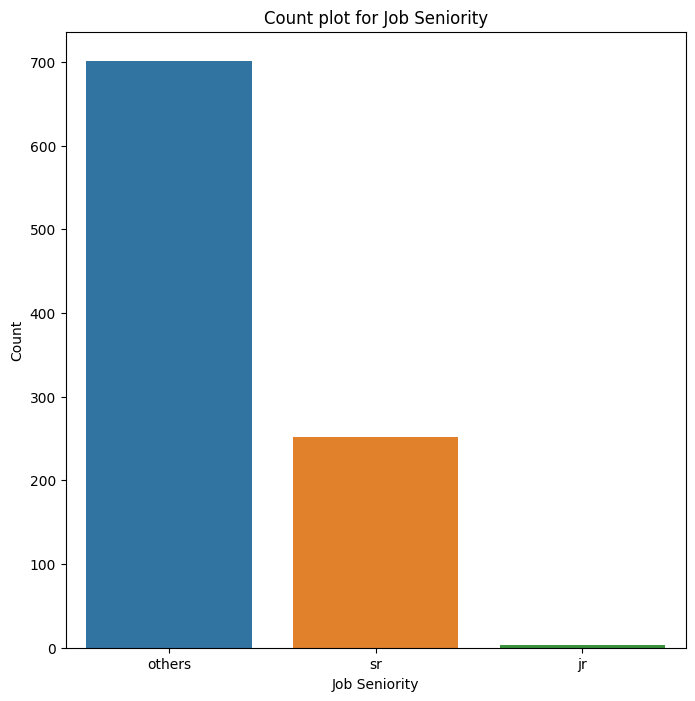

In [32]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
p = plt.title('Count plot for Job Seniority')
p = plt.xlabel('Job Seniority')
p = plt.ylabel('Count')

In [33]:
## Now we can remove the job title column 

df.drop(['Job Title'] ,axis = 1 , inplace = True)

In [34]:
df['Salary Estimate'].head()

0     $53K-$91K (Glassdoor est.)
1    $63K-$112K (Glassdoor est.)
2     $80K-$90K (Glassdoor est.)
3     $56K-$97K (Glassdoor est.)
4    $86K-$143K (Glassdoor est.)
Name: Salary Estimate, dtype: object

In [35]:
## Now cleaning up the salary extimate

salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])


In [36]:
salary.head()

0     $53K-$91K 
1    $63K-$112K 
2     $80K-$90K 
3     $56K-$97K 
4    $86K-$143K 
Name: Salary Estimate, dtype: object

In [37]:
salary.value_counts()

-1                  214
$86K-$143K            6
$54K-$115K            6
$49K-$113K            6
$21-$34 Per Hour      6
                   ... 
$74K-$119K            1
$55K-$97K             1
$15K-$16K             1
$61K-$106K            1
$62K-$113K            1
Name: Salary Estimate, Length: 417, dtype: int64

<AxesSubplot: >

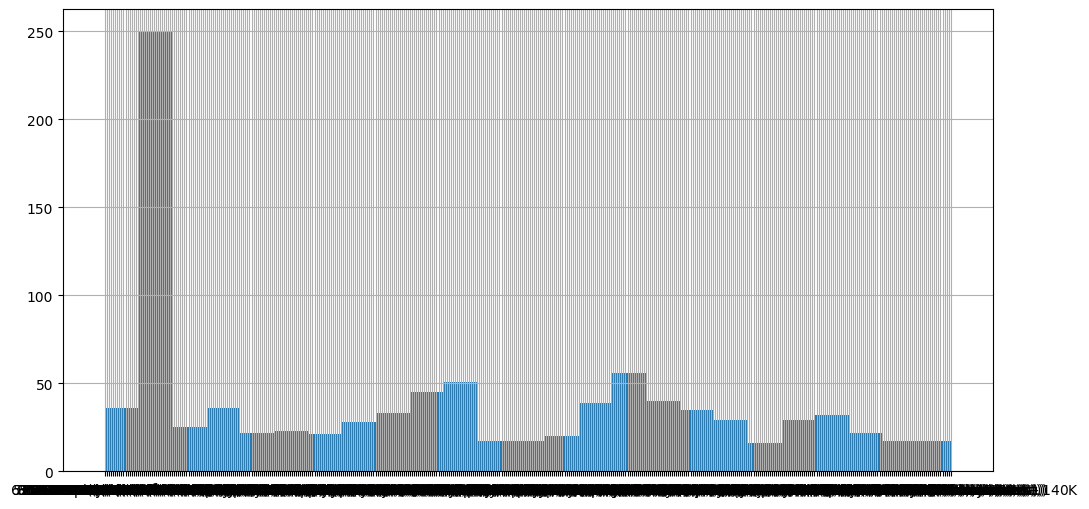

In [38]:
plt.figure(figsize=(12,6))
df['Salary Estimate'].hist(bins = 25)




In [39]:
salary.unique()

array(['$53K-$91K ', '$63K-$112K ', '$80K-$90K ', '$56K-$97K ',
       '$86K-$143K ', '$71K-$119K ', '$54K-$93K ', '$86K-$142K ',
       '$38K-$84K ', '$120K-$160K ', '$126K-$201K ', '$64K-$106K ',
       '$106K-$172K ', '$46K-$85K ', '$83K-$144K ', '$102K-$190K ',
       '$67K-$137K ', '$118K-$189K ', '$110K-$175K ', '$64K-$111K ',
       '$81K-$130K ', '$73K-$119K ', '$86K-$139K ', '$63K-$105K ', '-1',
       '$109K-$177K ', '$63K-$110K ', '$75K-$124K ', '$34K-$61K ',
       '$72K-$120K ', '$93K-$149K ', '$85K-$140K ', '$77K-$135K ',
       '$82K-$132K ', '$83K-$137K ', '$115K-$180K ', '$74K-$138K ',
       '$64K-$112K ', '$68K-$129K ', '$52K-$113K ', '$110K-$150K',
       'Employer Provided Salary:$150K-$160K', '$158K-$211K ',
       '$20K-$39K ', '$56K-$117K ', '$63K-$99K ', '$68K-$114K ',
       '$41K-$95K ', '$86K-$144K ', '$80K-$139K ', '$56K-$95K ',
       '$120K-$189K ', '$111K-$176K ', '$84K-$146K ', '$107K-$172K ',
       '$49K-$85K ', '$61K-$109K ', '$88K-$148K ', '$60K-$99

In [40]:
salary = salary.apply(lambda x:np.NaN if x=='-1' else x)


In [41]:
salary.head()

0     $53K-$91K 
1    $63K-$112K 
2     $80K-$90K 
3     $56K-$97K 
4    $86K-$143K 
Name: Salary Estimate, dtype: object

In [42]:
## Remove '$' and 'K' from 'salary estimate' column

salary = salary.apply(lambda x: x if type(x) == type(3.5) else x.replace('$' , '').replace('K',''))

In [43]:
salary.head()

0     53-91 
1    63-112 
2     80-90 
3     56-97 
4    86-143 
Name: Salary Estimate, dtype: object

In [44]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150',
       'Employer Provided Salary:150-160', '158-211 ', '20-39 ',
       '56-117 ', '63-99 ', '68-114 ', '41-95 ', '86-144 ', '80-139 ',
       '56-95 ', '120-189 ', '111-176 ', '84-146 ', '107-172 ', '49-85 ',
       '61-109 ', '88-148 ', '60-99 ', '41-72 ', '96-161 ', '65-130 ',
       '52-81 ', '139-220 ', '50-102 ', '85-139 ', '74-122 ', '99-157 ',
       '79-222 ', '57-118 ', '86-141 ', '94-154 ', '37-76 ', '100-160 ',
       '55-100 ', '60-114 ', '39-68 ', '64-107 ', '31-65 ', '34-62 ',
       '

In [45]:
salary = salary.apply(lambda x: x if type(x) == type(3.5) else x.lower().replace('employer provided salary:' , ''))

In [46]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ', 

In [47]:
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)


In [48]:
salary = salary.apply(lambda x: x if type(x)==type(3.5) 
                      else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], 
                                             x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))



In [49]:
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0].strip()) + int(x.split("-")[1].strip()))/2)


/tmp/ipykernel_82230/97790497.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


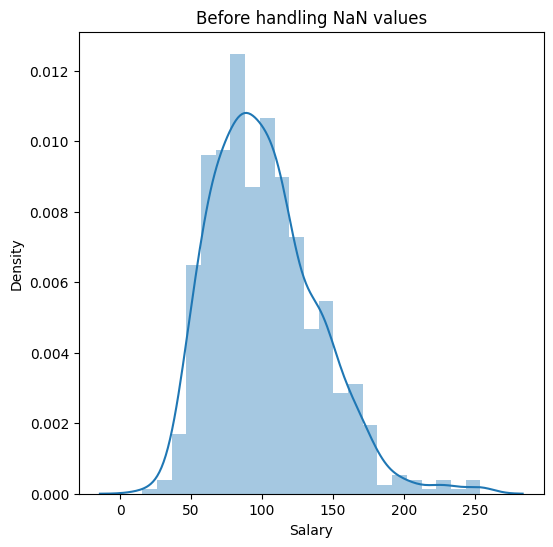

In [50]:
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')

In [51]:
salary.unique()

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 ', '68-129 ', '52-113 ', '110-150', '150-160',
       '158-211 ', '20-39 ', '56-117 ', '63-99 ', '68-114 ', '41-95 ',
       '86-144 ', '80-139 ', '56-95 ', '120-189 ', '111-176 ', '84-146 ',
       '107-172 ', '49-85 ', '61-109 ', '88-148 ', '60-99 ', '41-72 ',
       '96-161 ', '65-130 ', '52-81 ', '139-220 ', '50-102 ', '85-139 ',
       '74-122 ', '99-157 ', '79-222 ', '57-118 ', '86-141 ', '94-154 ',
       '37-76 ', '100-160 ', '55-100 ', '60-114 ', '39-68 ', '64-107 ',
       '31-65 ', '34-62 ', '117-231 ', '79-134 ', '52-93 ', 

/tmp/ipykernel_82230/3604602387.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


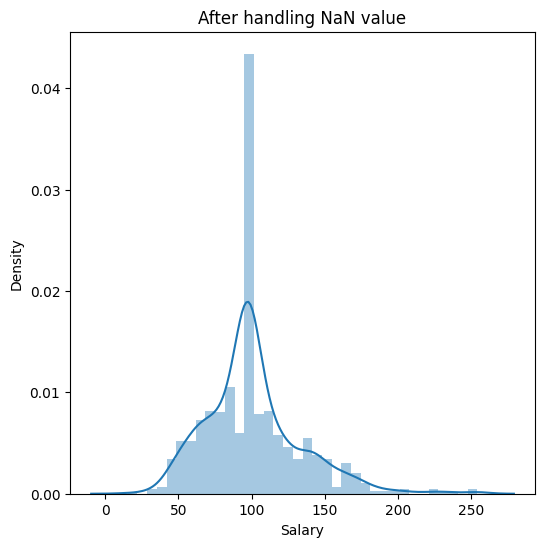

In [52]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('After handling NaN value')

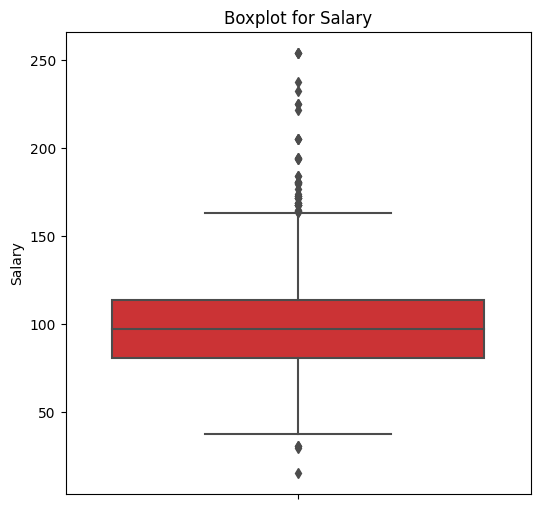

In [53]:
## outlier detection

plt.figure(figsize = (6,6))
sns.boxplot(y = 'Salary' , data = df , orient = 'v' , palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')


In [54]:
df.columns


Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Job_title',
       'job_seniority', 'Salary'],
      dtype='object')

In [55]:
## Cleaning company name

df['Company Name'].head()

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
Name: Company Name, dtype: object

In [56]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

In [57]:
df['Company Name'].head()

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
Name: Company Name, dtype: object

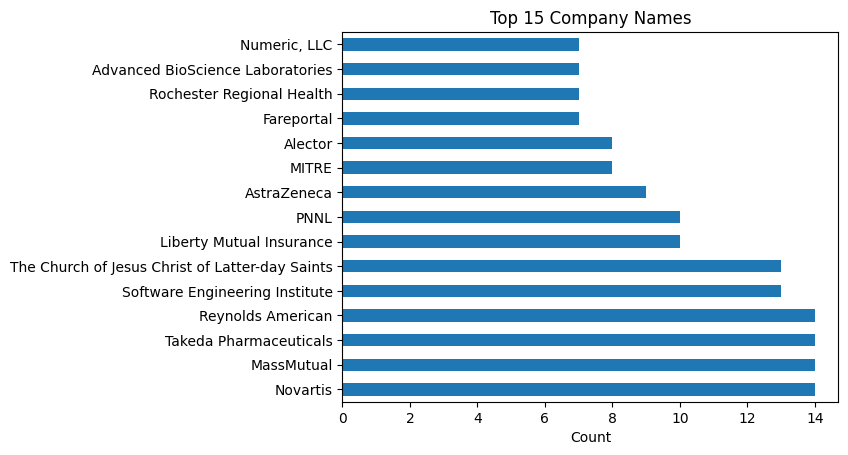

In [58]:
df['Company Name'].value_counts().nlargest(15).plot.barh()
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [59]:
df['Company Name'].value_counts()

Novartis                          14
MassMutual                        14
Takeda Pharmaceuticals            14
Reynolds American                 14
Software Engineering Institute    13
                                  ..
Systems Evolution Inc.             1
Centro                             1
comScore                           1
Genesis Research                   1
Fivestars                          1
Name: Company Name, Length: 448, dtype: int64

In [60]:
## Cleaning the location column

df['Location'].head()

0    Albuquerque, NM
1      Linthicum, MD
2     Clearwater, FL
3       Richland, WA
4       New York, NY
Name: Location, dtype: object

In [61]:
df['job_location'] = df['Location'].apply(lambda x:x if ',' not in x else x.split(',')[1].strip())

Text(0.5, 0, 'Count')

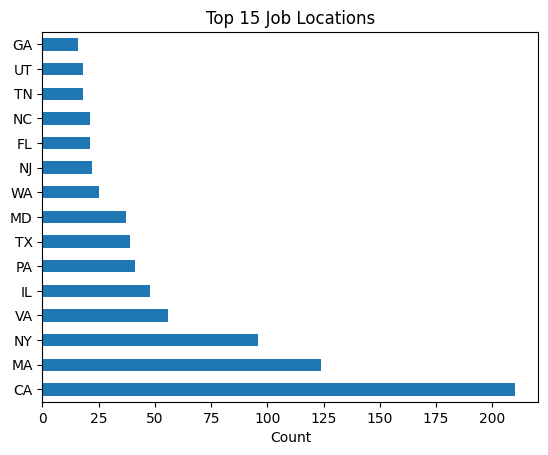

In [62]:
df['job_location'].value_counts().nlargest(15).plot.barh()
plt.title('Top 15 Job Locations')
plt.xlabel('Count')

In [63]:
df['job_location'].nunique()

46

In [64]:
## Cleaning the size column

df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [65]:
df['Size'] = df['Size'].apply(lambda x:x if '-1' not in x.lower() else 'Unknown')

In [66]:
df['Size'].value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     26
Name: Size, dtype: int64

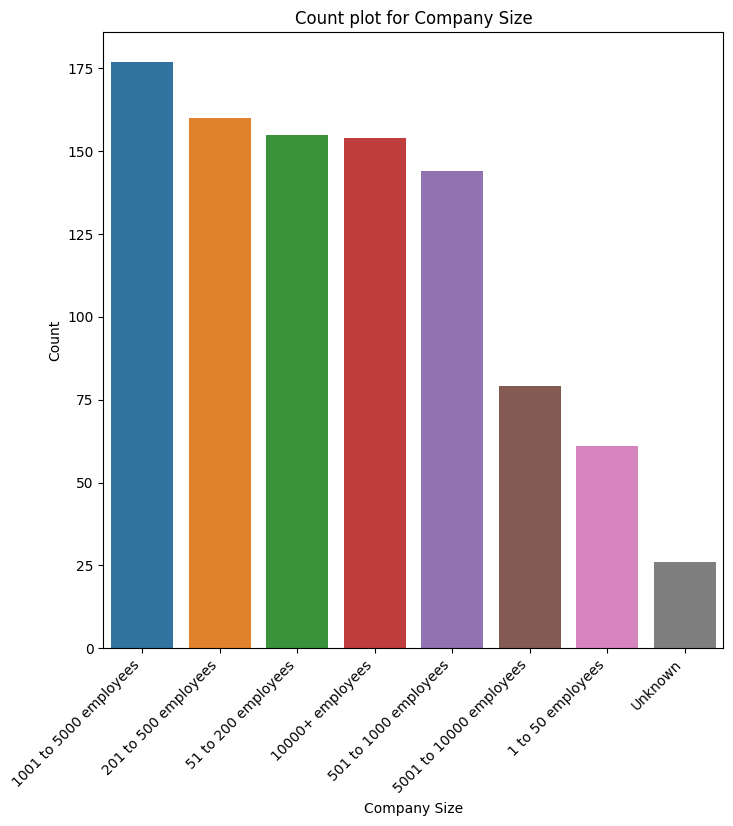

In [67]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [68]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Job_title',
       'job_seniority', 'Salary', 'job_location'],
      dtype='object')

In [69]:
df['Headquarters'].head()

0        Goleta, CA
1     Baltimore, MD
2    Clearwater, FL
3      Richland, WA
4      New York, NY
Name: Headquarters, dtype: object

In [70]:
## Cleaning the type of township

df['Type of ownership'].value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: Type of ownership, dtype: int64

In [71]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

[Text(0, 0, '1001 to 5000 employees'),
 Text(1, 0, '201 to 500 employees'),
 Text(2, 0, '51 to 200 employees'),
 Text(3, 0, '10000+ employees'),
 Text(4, 0, '501 to 1000 employees'),
 Text(5, 0, '5001 to 10000 employees'),
 Text(6, 0, '1 to 50 employees'),
 Text(7, 0, 'Unknown')]

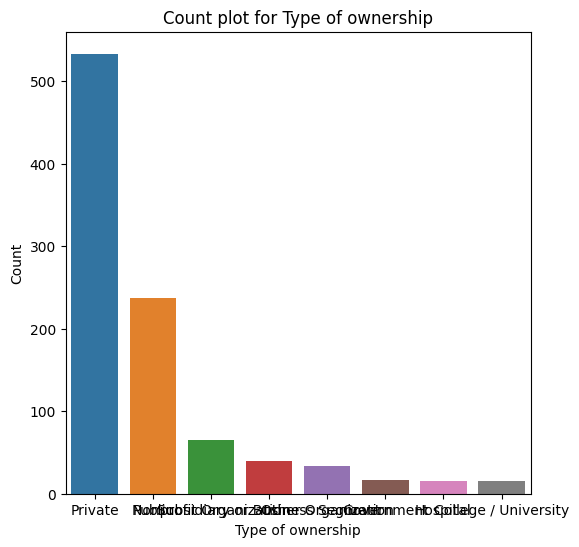

In [72]:
plt.figure(figsize = (6,6))
sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)

plt.title('Count plot for Type of ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(),rotation = 45,horizontalalignment='right')

In [73]:
## Cleaning the Industry column

df['Industry'].value_counts()

Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: Industry, Length: 63, dtype: int64

In [74]:
df['Industry'] = df['Industry'].apply(lambda x: 'others' if x=='-1' else x)

[Text(0, 0, '1001 to 5000 employees'),
 Text(1, 0, '201 to 500 employees'),
 Text(2, 0, '51 to 200 employees'),
 Text(3, 0, '10000+ employees'),
 Text(4, 0, '501 to 1000 employees'),
 Text(5, 0, '5001 to 10000 employees'),
 Text(6, 0, '1 to 50 employees'),
 Text(7, 0, 'Unknown')]

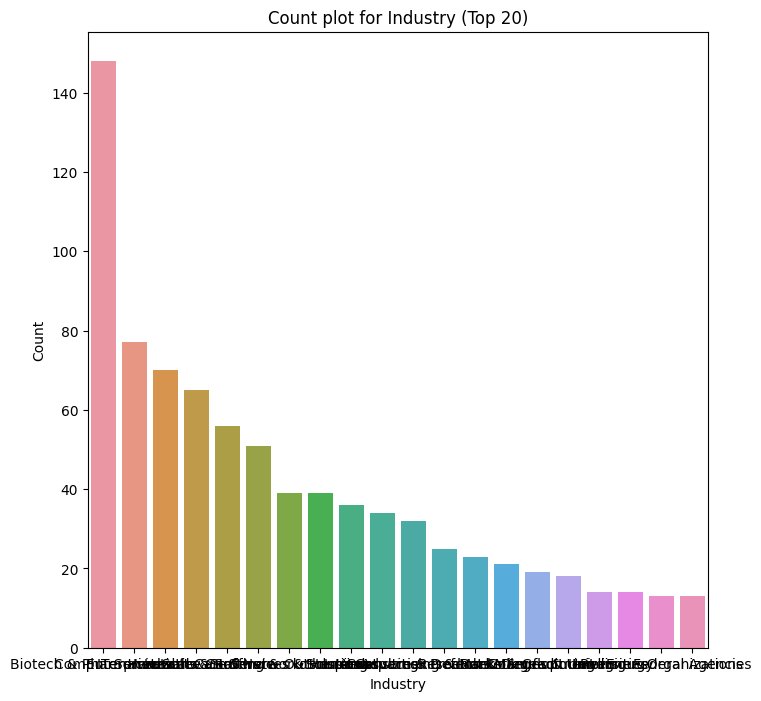

In [75]:
plt.figure(figsize=(8,8))
sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
plt.title('Count plot for Industry (Top 20)')
plt.xlabel('Industry')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [76]:
## Cleanig the sector column

df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [77]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

[Text(0, 0, '1001 to 5000 employees'),
 Text(1, 0, '201 to 500 employees'),
 Text(2, 0, '51 to 200 employees'),
 Text(3, 0, '10000+ employees'),
 Text(4, 0, '501 to 1000 employees'),
 Text(5, 0, '5001 to 10000 employees'),
 Text(6, 0, '1 to 50 employees'),
 Text(7, 0, 'Unknown')]

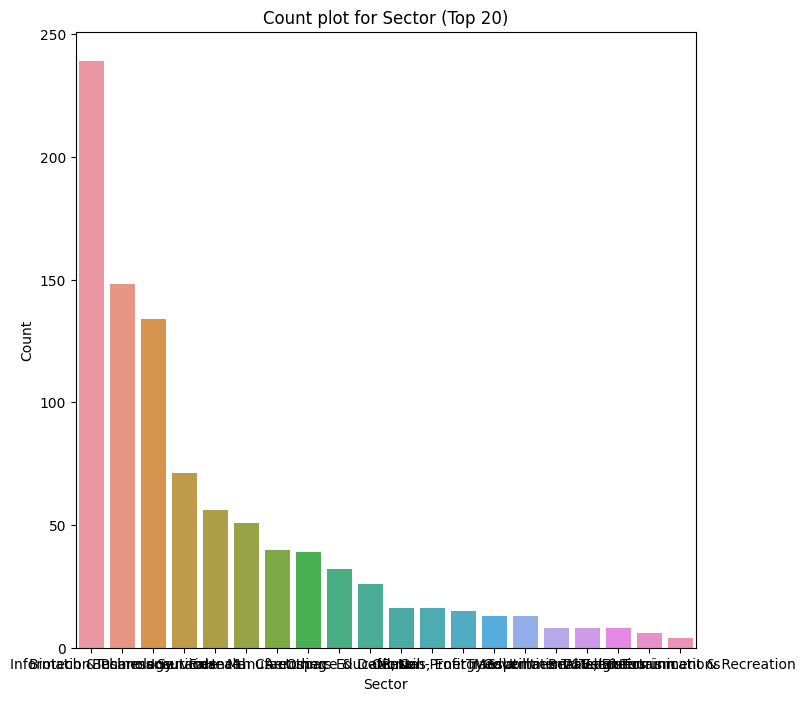

In [78]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
plt.title('Count plot for Sector (Top 20)')
plt.xlabel('Sector')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [79]:
## Cleaning the Revenue 

df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [80]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)

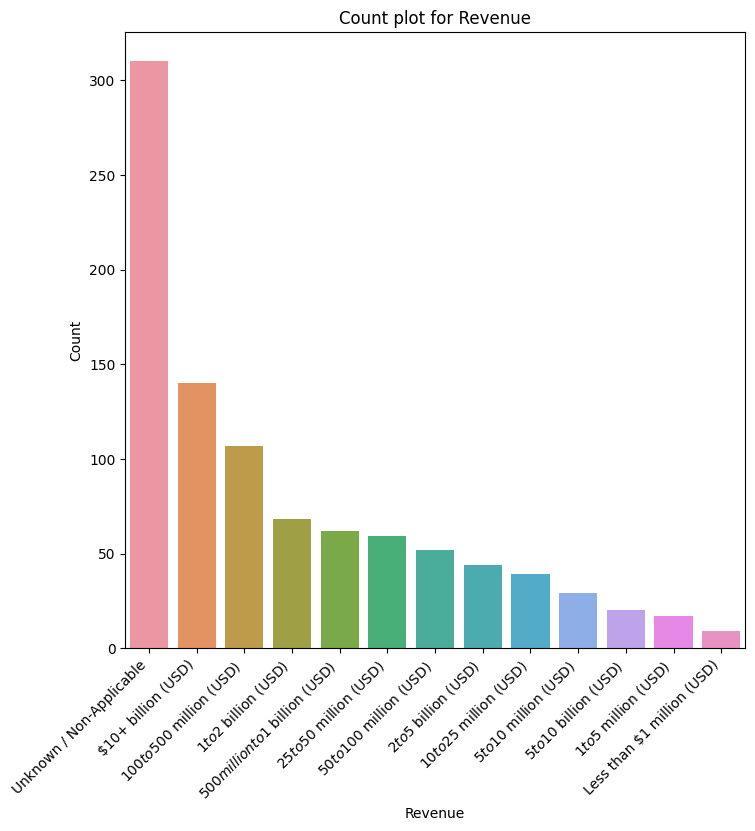

In [81]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [82]:
## Cleaning the Competitors

df['Competitors'].value_counts()

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
Slalom, Cognizant Technology Solutions, Deloitte                                                  1
Greystar, The Related Companies, Prometheus Real Estate Group                                     1
Ecolab, Eurofin Private Investment Office                                                         1
USAA, Navy Federal Credit Union, Raymond James Financial                                          1


In [83]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0)

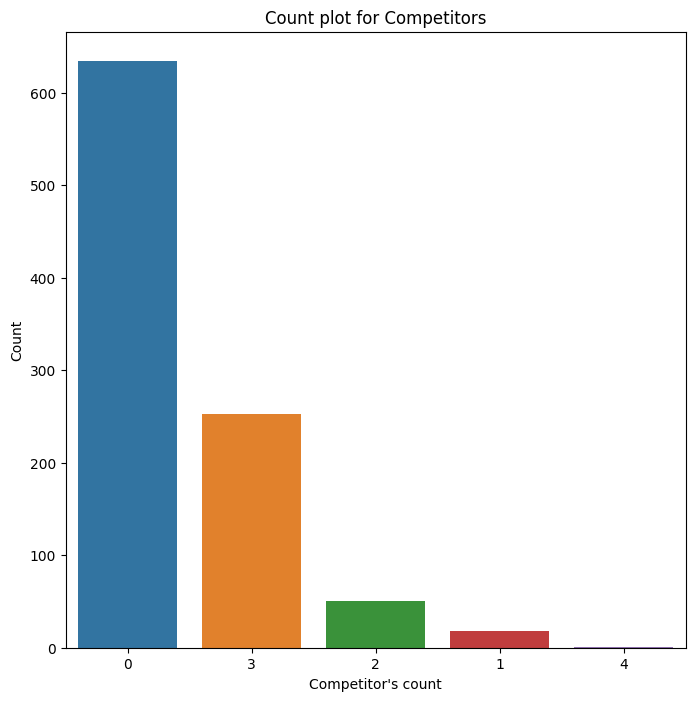

In [84]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [85]:
df['Competitors'].value_counts()

0    634
3    253
2     50
1     18
4      1
Name: Competitors, dtype: int64

In [86]:
## Final dataset

df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,job_seniority,Salary,job_location
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,others,72.0,NM
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,others,87.5,MD
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,others,85.0,FL
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,others,76.5,WA
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,others,114.5,NY


/tmp/ipykernel_82230/2160249353.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


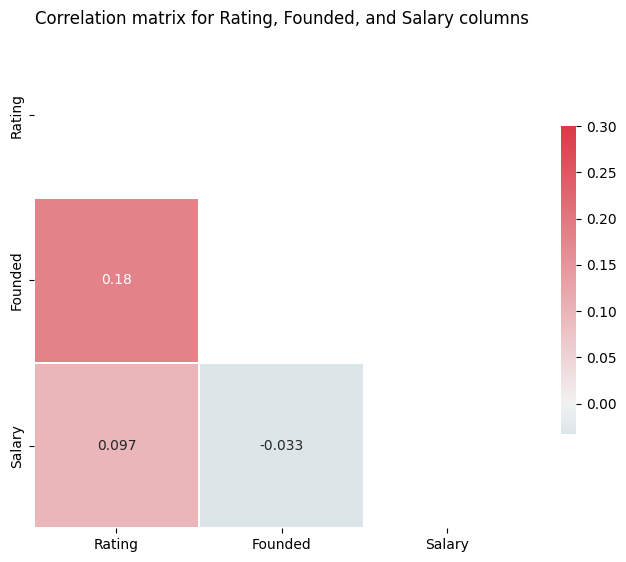

In [87]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

## Feature Engineering
1. Creating new features from existing features
2. Trimming Columns
3. Handling ordinal and nominal categorical features
4. Feature Selection

### Creating new features from existing features
1. Adding column of job_in_headquarters
2. Adding columns of python, excel, sql, tableau jobs

In [88]:
## Creating a new column job in headquarters

df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location']==x['Headquarters'] else 0, axis = 1 )

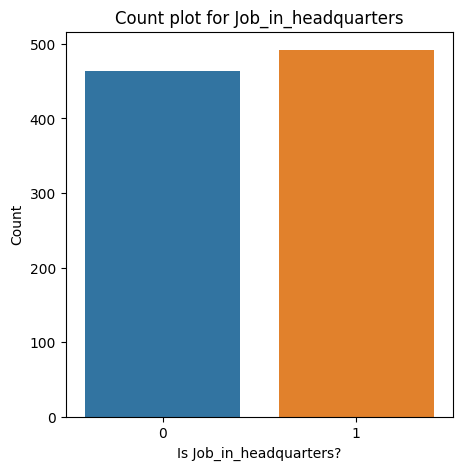

In [89]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='job_in_headquarters', data=df)
p = plt.title('Count plot for Job_in_headquarters')
p = plt.xlabel("Is Job_in_headquarters?")
p = plt.ylabel('Count')

In [90]:
df.columns

Index(['Salary Estimate', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'Job_title',
       'job_seniority', 'Salary', 'job_location', 'job_in_headquarters'],
      dtype='object')

In [91]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [92]:
df['Job Description'].head(1)

0    Data Scientist\nLocation: Albuquerque, NM\nEdu...
Name: Job Description, dtype: object

In [93]:
df['Job Description'].nunique()

596

In [94]:
# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

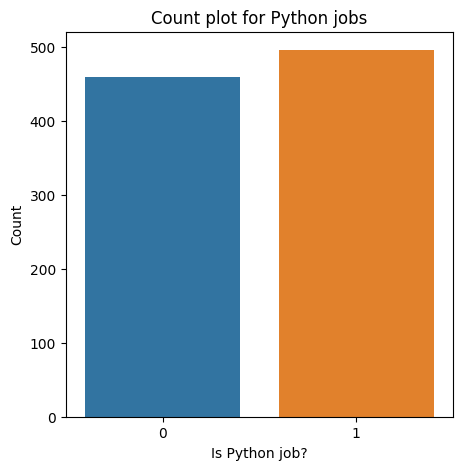

In [95]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='python_job', data=df)
p = plt.title('Count plot for Python jobs')
p = plt.xlabel("Is Python job?")
p = plt.ylabel('Count')

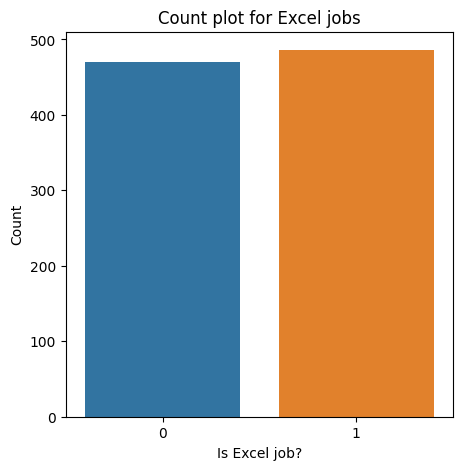

In [96]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='excel_job', data=df)
p = plt.title('Count plot for Excel jobs')
p = plt.xlabel("Is Excel job?")
p = plt.ylabel('Count')

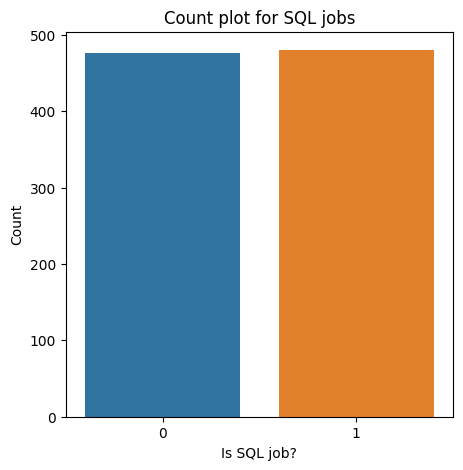

In [97]:

plt.figure(figsize=(5,5))
g = sns.countplot(x='sql_job', data=df)
p = plt.title('Count plot for SQL jobs')
p = plt.xlabel("Is SQL job?")
p = plt.ylabel('Count')

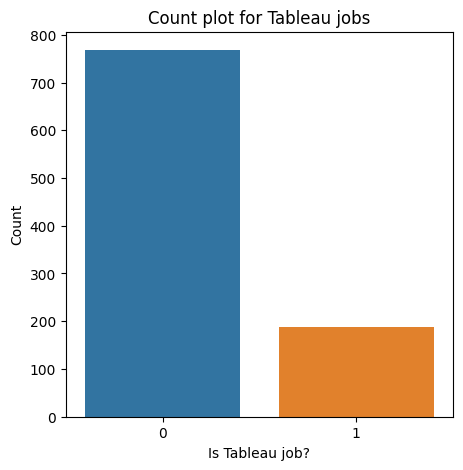

In [98]:
plt.figure(figsize=(5,5))
g = sns.countplot(x='tableau_job', data=df)
p = plt.title('Count plot for Tableau jobs')
p = plt.xlabel("Is Tableau job?")
p = plt.ylabel('Count')

In [99]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

In [100]:
df['Sector'].nunique()

25

In [101]:
df.head()

,Salary Estimate,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,job_seniority,Salary,job_location,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research,"Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,others,72.0,NM,0,1,1,0,1
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System,"Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,others,87.5,MD,0,1,0,0,0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,others,85.0,FL,1,1,1,1,0
3,$56K-$97K (Glassdoor est.),3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,others,76.5,WA,1,1,0,0,0
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,others,114.5,NY,1,1,1,1,0


In [102]:
df['Sector'].value_counts()

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
Others                                 39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry            

In [103]:
sector_list = list(df['Sector'].value_counts()[:10].index)

In [104]:
sector_list

['Information Technology',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Insurance',
 'Finance',
 'Health Care',
 'Manufacturing',
 'Others',
 'Aerospace & Defense',
 'Education']

In [105]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others'if x not in sector_list else x)

[Text(0, 0, 'Information Technology'),
 Text(1, 0, 'Others'),
 Text(2, 0, 'Biotech & Pharmaceuticals'),
 Text(3, 0, 'Business Services'),
 Text(4, 0, 'Insurance'),
 Text(5, 0, 'Finance'),
 Text(6, 0, 'Health Care'),
 Text(7, 0, 'Manufacturing'),
 Text(8, 0, 'Aerospace & Defense'),
 Text(9, 0, 'Education')]

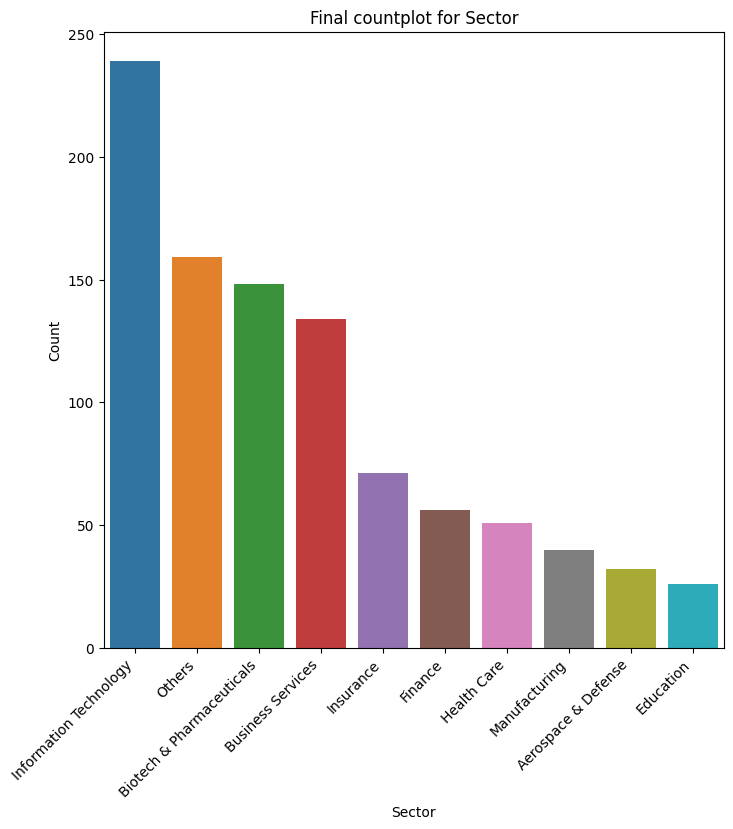

In [106]:
plt.figure(figsize = (8,8))
g = sns.countplot(x = 'Sector' , data = df , order = df['Sector'].value_counts().index)
plt.title('Final countplot for Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [107]:
## trimming the job location column

df['job_location'].value_counts()

CA               210
MA               124
NY                96
VA                56
IL                48
PA                41
TX                39
MD                37
WA                25
NJ                22
FL                21
NC                21
TN                18
UT                18
GA                16
OH                14
CO                13
AZ                13
DC                12
MO                11
WI                10
IN                10
MI                 9
AL                 9
DE                 6
KY                 6
IA                 5
CT                 5
NE                 5
LA                 4
OR                 4
MN                 4
KS                 3
NM                 3
Virginia           3
New Jersey         2
ID                 2
RI                 2
Oregon             2
Los Angeles        1
AK                 1
United States      1
SC                 1
PR                 1
Maryland           1
Michigan           1
Name: job_location, dtype: int64

In [108]:
job_location_list = list(df['job_location'].value_counts()[:9].index)

In [109]:
df['job_location'] = df['job_location'].apply(lambda x: 'Others'if x not in job_location_list else x)

In [110]:
df['job_location'].value_counts()

Others    280
CA        210
MA        124
NY         96
VA         56
IL         48
PA         41
TX         39
MD         37
WA         25
Name: job_location, dtype: int64

[Text(0, 0, 'Others'),
 Text(1, 0, 'CA'),
 Text(2, 0, 'MA'),
 Text(3, 0, 'NY'),
 Text(4, 0, 'VA'),
 Text(5, 0, 'IL'),
 Text(6, 0, 'PA'),
 Text(7, 0, 'TX'),
 Text(8, 0, 'MD'),
 Text(9, 0, 'WA')]

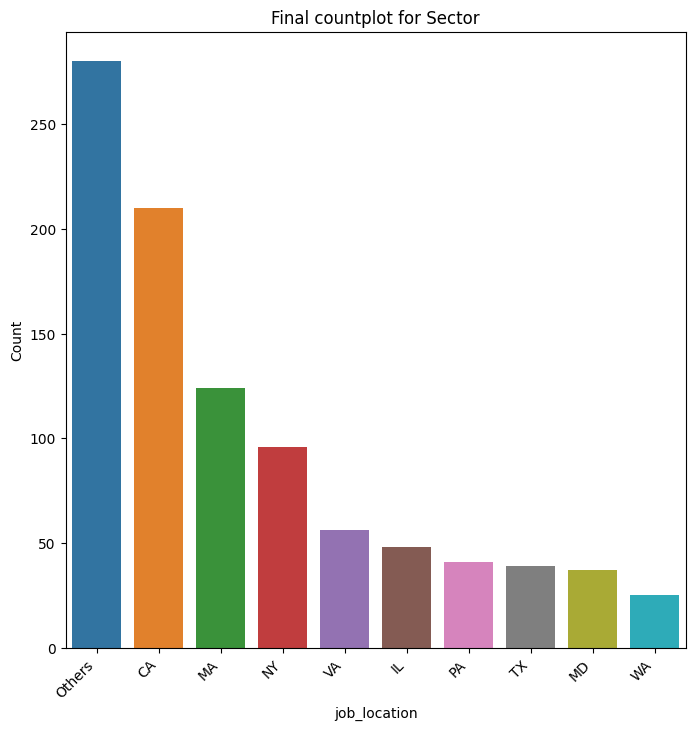

In [111]:
plt.figure(figsize = (8,8))
g = sns.countplot(x = 'job_location' , data = df , order = df['job_location'].value_counts().index)
plt.title('Final countplot for Sector')
plt.xlabel('job_location')
plt.ylabel('Count')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [112]:
df.head()

,Salary Estimate,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Job_title,job_seniority,Salary,job_location,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,$53K-$91K (Glassdoor est.),3.8,Tecolote Research,"Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,others,72.0,Others,0,1,1,0,1
1,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System,"Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,others,87.5,MD,0,1,0,0,0
2,$80K-$90K (Glassdoor est.),4.8,KnowBe4,"Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,others,85.0,Others,1,1,1,1,0
3,$56K-$97K (Glassdoor est.),3.8,PNNL,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,Others,$500 million to $1 billion (USD),3,data scientist,others,76.5,WA,1,1,0,0,0
4,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions,"New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,others,114.5,NY,1,1,1,1,0


In [113]:
df.drop(['Salary Estimate' , 'Company Name' , 'Headquarters','Industry' , 'job_location'] , axis = 1 , inplace = True)

In [114]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'Job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [115]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

In [116]:
df.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,job_seniority,salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,501 to 1000 employees,1973,Private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,others,72.0,0,1,1,0,1
1,3.4,10000+ employees,1984,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,others,87.5,0,1,0,0,0
2,4.8,501 to 1000 employees,2010,Private,Business Services,$100 to $500 million (USD),0,data scientist,others,85.0,1,1,1,1,0
3,3.8,1001 to 5000 employees,1965,Government,Others,$500 million to $1 billion (USD),3,data scientist,others,76.5,1,1,0,0,0
4,2.9,51 to 200 employees,1998,Private,Business Services,Unknown / Non-Applicable,3,data scientist,others,114.5,1,1,1,1,0


In [117]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [118]:
df.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,job_seniority,salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,4,1973,Private,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,others,72.0,0,1,1,0,1
1,3.4,7,1984,Other Organization,Health Care,$2 to $5 billion (USD),0,data scientist,others,87.5,0,1,0,0,0
2,4.8,4,2010,Private,Business Services,$100 to $500 million (USD),0,data scientist,others,85.0,1,1,1,1,0
3,3.8,5,1965,Government,Others,$500 million to $1 billion (USD),3,data scientist,others,76.5,1,1,0,0,0
4,2.9,2,1998,Private,Business Services,Unknown / Non-Applicable,3,data scientist,others,114.5,1,1,1,1,0


In [119]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [120]:
df.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,job_seniority,salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,4,1973,Private,Aerospace & Defense,6,0,data scientist,others,72.0,0,1,1,0,1
1,3.4,7,1984,Other Organization,Health Care,10,0,data scientist,others,87.5,0,1,0,0,0
2,4.8,4,2010,Private,Business Services,7,0,data scientist,others,85.0,1,1,1,1,0
3,3.8,5,1965,Government,Others,8,3,data scientist,others,76.5,1,1,0,0,0
4,2.9,2,1998,Private,Business Services,0,3,data scientist,others,114.5,1,1,1,1,0


In [121]:
df['job_seniority'].value_counts()

others    701
sr        252
jr          3
Name: job_seniority, dtype: int64

In [122]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'others': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

In [123]:
df.head()

,company_rating,company_size,company_founded,type_of_ownership,sector,revenue,competitors,Job_title,job_seniority,salary,job_in_headquarters,python_job,excel_job,sql_job,tableau_job
0,3.8,4,1973,Private,Aerospace & Defense,6,0,data scientist,0,72.0,0,1,1,0,1
1,3.4,7,1984,Other Organization,Health Care,10,0,data scientist,0,87.5,0,1,0,0,0
2,4.8,4,2010,Private,Business Services,7,0,data scientist,0,85.0,1,1,1,1,0
3,3.8,5,1965,Government,Others,8,3,data scientist,0,76.5,1,1,0,0,0
4,2.9,2,1998,Private,Business Services,0,3,data scientist,0,114.5,1,1,1,1,0


In [124]:
df['type_of_ownership'].value_counts()

Private                           533
Public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Other Organization                 34
Government                         17
Hospital                           15
College / University               15
Name: type_of_ownership, dtype: int64

In [125]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))

Before: (956, 15)


In [126]:
df = pd.get_dummies(data = df , columns=['type_of_ownership'] , prefix = 'ownership')

In [127]:
df.shape

(956, 22)

In [128]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [129]:
df.head()

,company_rating,company_size,company_founded,revenue,competitors,Job_title,job_seniority,salary,job_in_headquarters,python_job,...,sector_Aerospace & Defense,sector_Biotech & Pharmaceuticals,sector_Business Services,sector_Education,sector_Finance,sector_Health Care,sector_Information Technology,sector_Insurance,sector_Manufacturing,sector_Others
0,3.8,4,1973,6,0,data scientist,0,72.0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,3.4,7,1984,10,0,data scientist,0,87.5,0,1,...,0,0,0,0,0,1,0,0,0,0
2,4.8,4,2010,7,0,data scientist,0,85.0,1,1,...,0,0,1,0,0,0,0,0,0,0
3,3.8,5,1965,8,3,data scientist,0,76.5,1,1,...,0,0,0,0,0,0,0,0,0,1
4,2.9,2,1998,0,3,data scientist,0,114.5,1,1,...,0,0,1,0,0,0,0,0,0,0


In [130]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['Job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   company_rating                            956 non-null    float64
 1   company_size                              956 non-null    int64  
 2   company_founded                           956 non-null    int64  
 3   revenue                                   956 non-null    int64  
 4   competitors                               956 non-null    int64  
 5   job_seniority                             956 non-null    int64  
 6   salary                                    956 non-null    float64
 7   job_in_headquarters                       956 non-null    int64  
 8   python_job                                956 non-null    int64  
 9   excel_job                                 956 non-null    int64  
 10  sql_job                               

In [132]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'Job_title_others'], axis=1, inplace=True)

In [149]:
df.shape

(956, 34)

In [164]:
## Select feature based on information gain

X = df.drop('salary' , axis = 1)
y = df['salary']

In [165]:
X.shape

(956, 33)

In [166]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [167]:
fs = SelectKBest(score_func=mutual_info_regression , k ='all')
fs.fit(X,y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7fb7ff0b7790>)

In [168]:
fs.scores_

array([0.54959795, 0.28900462, 0.49888751, 0.31448041, 0.1505671 ,
       0.10783447, 0.10150958, 0.13775863, 0.10232286, 0.09493004,
       0.08104038, 0.02238674, 0.02404764, 0.03648306, 0.0532548 ,
       0.08129493, 0.10538743, 0.03659355, 0.02450136, 0.05846552,
       0.06001533, 0.02808494, 0.0362566 , 0.06798342, 0.0900758 ,
       0.04519803, 0.04945229, 0.12248163, 0.07080064, 0.1454609 ,
       0.00998175, 0.01611552, 0.00894144])

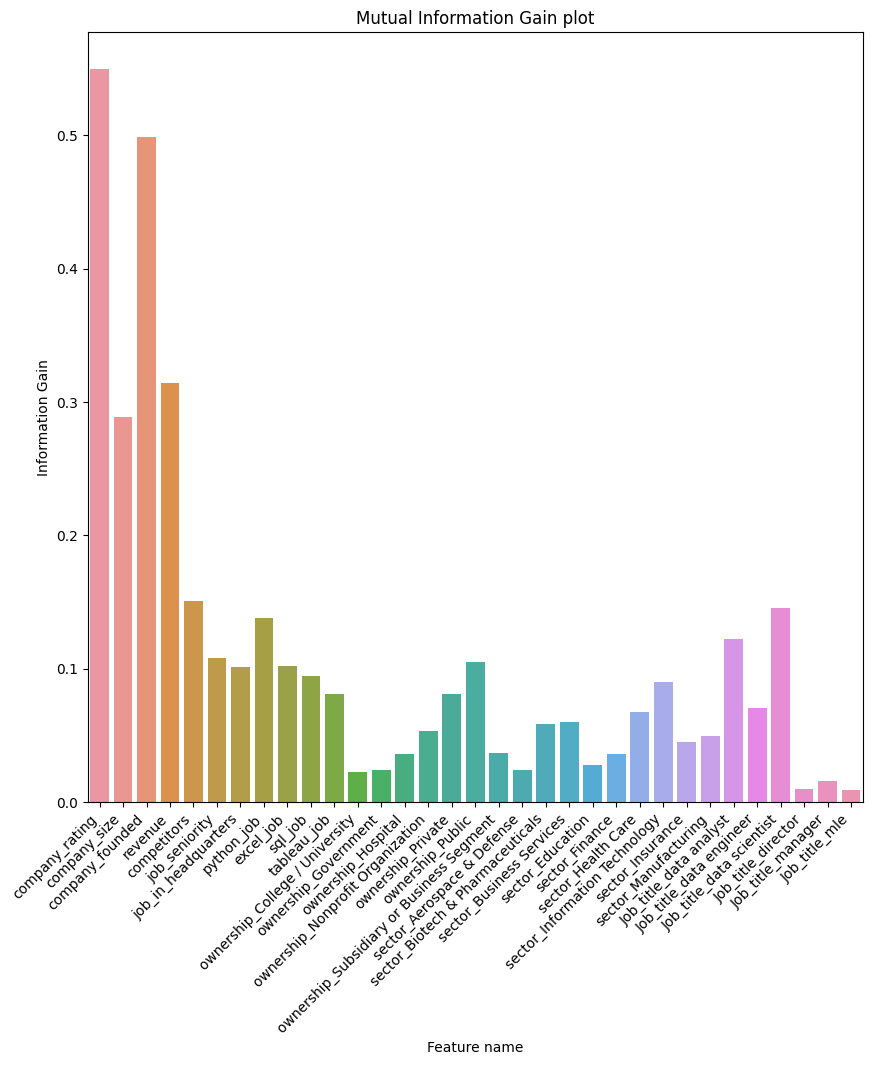

In [169]:
plt.figure(figsize=(10,10))
g = sns.barplot(x=X.columns, y=fs.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

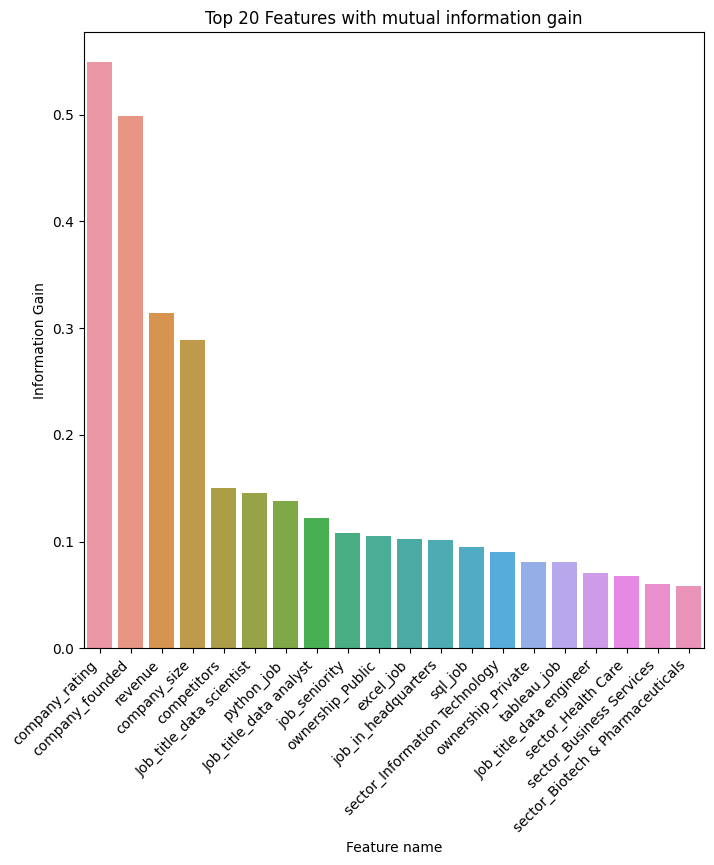

In [170]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   company_rating                            956 non-null    float64
 1   company_size                              956 non-null    int64  
 2   company_founded                           956 non-null    int64  
 3   revenue                                   956 non-null    int64  
 4   competitors                               956 non-null    int64  
 5   job_seniority                             956 non-null    int64  
 6   job_in_headquarters                       956 non-null    int64  
 7   python_job                                956 non-null    int64  
 8   excel_job                                 956 non-null    int64  
 9   sql_job                                   956 non-null    int64  
 10  tableau_job                           

/tmp/ipykernel_82230/3686405298.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


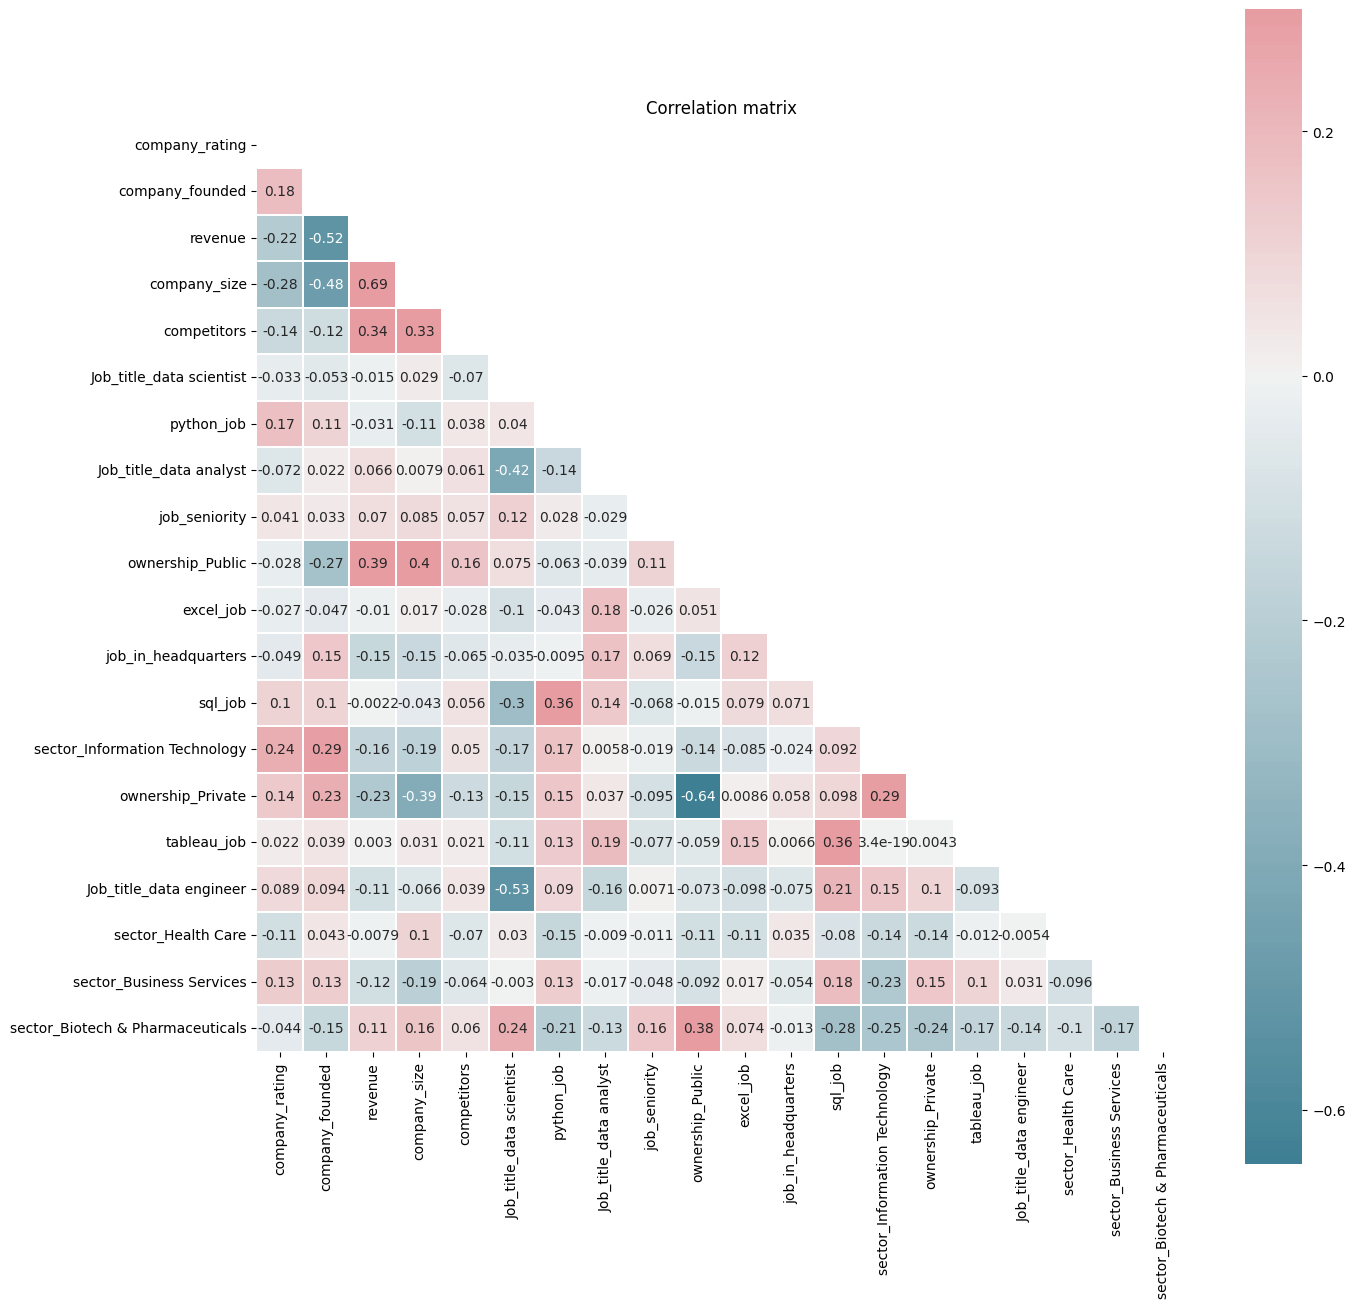

In [172]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

#### Insight: From the correlation matrix, it is evident that features (ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated. Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [173]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'Job_title_data engineer'], axis=1, inplace=True)

/tmp/ipykernel_82230/4207917739.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


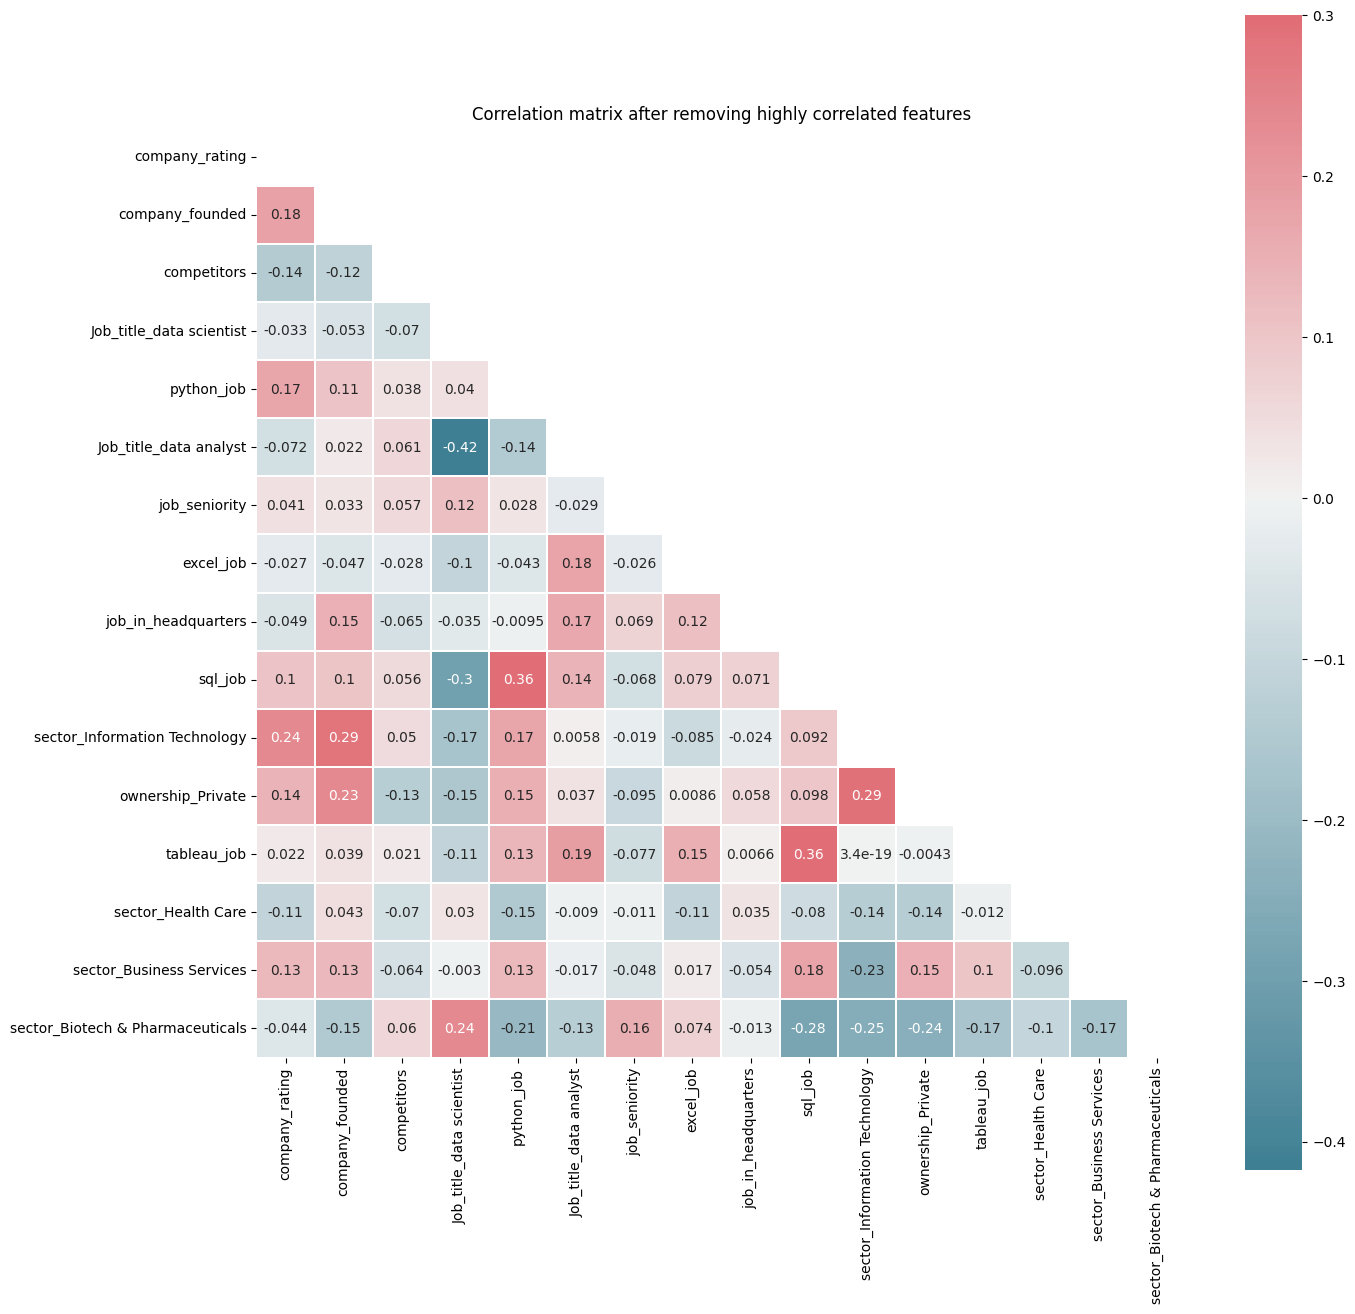

In [174]:
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [175]:
X.columns

Index(['company_rating', 'company_founded', 'competitors',
       'Job_title_data scientist', 'python_job', 'Job_title_data analyst',
       'job_seniority', 'excel_job', 'job_in_headquarters', 'sql_job',
       'sector_Information Technology', 'ownership_Private', 'tableau_job',
       'sector_Health Care', 'sector_Business Services',
       'sector_Biotech & Pharmaceuticals'],
      dtype='object')

In [176]:
X.head()

,company_rating,company_founded,competitors,Job_title_data scientist,python_job,Job_title_data analyst,job_seniority,excel_job,job_in_headquarters,sql_job,sector_Information Technology,ownership_Private,tableau_job,sector_Health Care,sector_Business Services,sector_Biotech & Pharmaceuticals
0,3.8,1973,0,1,1,0,0,1,0,0,0,1,1,0,0,0
1,3.4,1984,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,4.8,2010,0,1,1,0,0,1,1,1,0,1,0,0,1,0
3,3.8,1965,3,1,1,0,0,0,1,0,0,0,0,0,0,0
4,2.9,1998,3,1,1,0,0,1,1,1,0,1,0,0,1,0


In [180]:
## feature Scaling

from sklearn.preprocessing import StandardScaler

X_prev = X.copy()

std1 = StandardScaler()
X['company_rating'] = std1.fit_transform(X[['company_rating']])

std2 = StandardScaler()
X['company_founded'] = std2.fit_transform(X[['company_founded']])

/tmp/ipykernel_82230/4265483502.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=X_prev['company_rating'])
/tmp/ipykernel_82230/4265483502.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=X['company_rating'])


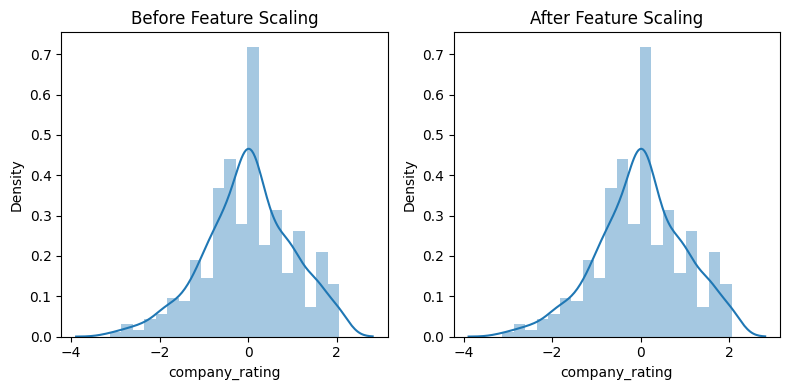

In [181]:
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

In [182]:
X.head()

,company_rating,company_founded,competitors,Job_title_data scientist,python_job,Job_title_data analyst,job_seniority,excel_job,job_in_headquarters,sql_job,sector_Information Technology,ownership_Private,tableau_job,sector_Health Care,sector_Business Services,sector_Biotech & Pharmaceuticals
0,0.048588,-0.043407,0,1,1,0,0,1,0,0,0,1,1,0,0,0
1,-0.620043,0.184030,0,1,1,0,0,0,0,0,0,0,0,1,0,0
2,1.720165,0.721608,0,1,1,0,0,1,1,1,0,1,0,0,1,0
3,0.048588,-0.208815,3,1,1,0,0,0,1,0,0,0,0,0,0,0
4,-1.455831,0.473495,3,1,1,0,0,1,1,1,0,1,0,0,1,0


## Model building and Evaluation

In [183]:
from sklearn.model_selection import cross_val_score

In [186]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr,X,y,cv = 10 , scoring = 'neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.501 ---
Standard Deviation: 2.319


In [185]:
cv

array([-25.71407858, -27.67564741, -24.25814608, -24.58777078,
       -28.4761283 , -30.86852246, -26.50506591, -29.07456861,
       -31.34715783, -26.50358456])

In [187]:
from sklearn.linear_model import Lasso

lasso = Lasso()
cv = cross_val_score(lasso , X,y,cv = 10 , scoring = 'neg_root_mean_squared_error')
print('CV  ', cv)
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))


CV   [-25.98805055 -27.79832889 -26.82886668 -25.43605138 -29.47466557
 -31.32535363 -27.78887539 -28.74290303 -30.01608928 -26.32202112]
--- Average NRMSE: -27.972 ---
Standard Deviation: 1.809


In [188]:
# Fitting Random Forest to the training data
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
cv = cross_val_score(rf , X,y,cv = 10 , scoring = 'neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -17.761 ---
Standard Deviation: 5.39


In [189]:
## Fitting Gradient Boosting to the Training

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -24.502 ---
Standard Deviation: 2.706


In [190]:
## Fitting XGBOOST to the training data

import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
cv = cross_val_score(xgb_r, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:08:42] WARNING: ../src/objective/regression_

## Note: Random Forest & Gradient Boosting algorithms are selected amongst all the other algorithms because they have the highest value for Negative Root Mean Squared Error (NRMSE) i.e. lowest value for Root Mean Squared Error (RMSE) metric. And fed to Voting algorithm to reduce the error!

In [192]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor([('random_forest',rf) , ('gradient_boosting' , gb)] , weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -19.261 ---
Standard Deviation: 4.368


In [193]:
from sklearn.ensemble import VotingRegressor

vr = VotingRegressor([('random_forest',rf) , ('XGBOOST' , xgb_r)] , weights=[2,1])
cv = cross_val_score(vr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

[22:12:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:19] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:19] WARNING: ../src/objective/regression_

## Note: Voting algorithm too did not perform well as compared to Random Forest algorithm, hence Random Forest algorithm is selected for predicting the results of this problem statement.

In [194]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [198]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):
    prediction_input = list()

    prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
    prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
    prediction_input.append(competitors)   
    sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
    temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
    
    for index in range(0, len(sector_columns)):
        if sector_columns[index] == 'sector_' + sector:
            temp[index] = 1
            break
    prediction_input = prediction_input + temp
    
    
    if ownership == 'Private':
        prediction_input.append(1)
    else:
        prediction_input.append(0)
    
    job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
    temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
    for index in range(0, len(job_title_columns)):
        if job_title_columns[index] == 'job_title_' + job_title:
            temp[index] = 1
            break
    prediction_input = prediction_input + temp


    prediction_input.append(job_in_headquarters)


    job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
    prediction_input.append(job_seniority_map[job_seniority])


    temp = list(map(int, np.zeros(shape=(1, 4))[0]))
    if 'excel' in job_skills:
        temp[0] = 1
    if 'python' in job_skills:
        temp[1] = 1
    if 'tableau' in job_skills:
        temp[2] = 1
    if 'sql' in job_skills:
        temp[3] = 1
    prediction_input = prediction_input + temp


    return rf.predict([prediction_input])[0]    

In [199]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 77605(USD) to 95605(USD) per annum.


/home/nitesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/nitesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/nitesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [200]:
# Prediction 2
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(3.0, 2000, 1, 'Health Care', 'Public', 'data analyst', 0, 'jr', ['python', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 93450(USD) to 111450(USD) per annum.


/home/nitesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/nitesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/nitesh/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
